### Stock Market Prediction


In [2]:
%pip install pandas_datareader

/bin/bash: /home/deval21/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.get_data_tiingo('TSLA',api_key='9b01dc4cb99cda4b56185c879fa44ad70279c896')

/tmp/ipykernel_53/4215578779.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('TSLA',api_key='9b01dc4cb99cda4b56185c879fa44ad70279c896')


In [4]:
df.to_csv('TSLA.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('TSLA.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-03-26 00:00:00+00:00,304.18,307.59,291.36,307.34,8324639,20.278667,20.506000,19.424000,20.489333,124869585,0.0,1.0
1,TSLA,2018-03-27 00:00:00+00:00,279.18,304.27,277.18,304.00,13696168,18.612000,20.284667,18.478667,20.266667,205442520,0.0,1.0
2,TSLA,2018-03-28 00:00:00+00:00,257.78,268.68,252.10,264.58,21001437,17.185333,17.912000,16.806667,17.638667,315021555,0.0,1.0
3,TSLA,2018-03-29 00:00:00+00:00,266.13,270.96,248.21,256.49,15170749,17.742000,18.064000,16.547333,17.099333,227561235,0.0,1.0
4,TSLA,2018-04-02 00:00:00+00:00,252.48,260.33,244.59,256.26,16113968,16.832000,17.355333,16.306000,17.084000,241709520,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,TSLA,2023-03-17 00:00:00+00:00,180.13,186.2199,177.33,184.515,133197140,180.13,186.2199,177.33,184.515,133197140,0.0,1.0
1254,TSLA,2023-03-20 00:00:00+00:00,183.25,186.4400,176.35,178.080,129684359,183.25,186.4400,176.35,178.080,129684359,0.0,1.0
1255,TSLA,2023-03-21 00:00:00+00:00,197.58,198.0000,188.04,188.280,153391444,197.58,198.0000,188.04,188.280,153391444,0.0,1.0
1256,TSLA,2023-03-22 00:00:00+00:00,191.15,200.6600,190.95,199.300,150376373,191.15,200.6600,190.95,199.300,150376373,0.0,1.0
1257,TSLA,2023-03-23 00:00:00+00:00,192.22,199.3100,188.65,195.260,144193876,192.22,199.3100,188.65,195.260,144193876,0.0,1.0


In [8]:
df2 = df.reset_index()['close']

In [9]:
df2.shape

(1258,)

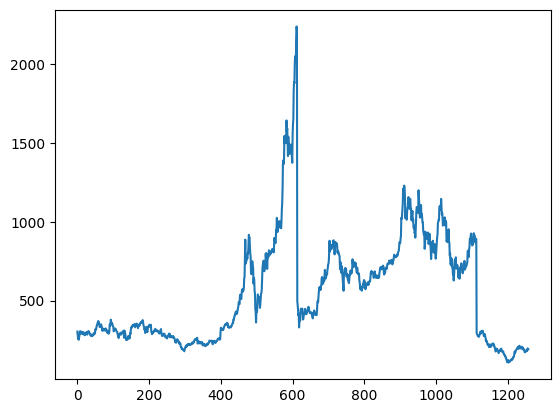

In [10]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [11]:
import numpy as np

In [12]:
%pip install scikit-learn
%pip install seaborn
%pip install scipy
%pip install statsmodels

/bin/bash: /home/deval21/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.
/bin/bash: /home/deval21/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.
/bin/bash: /home/deval21/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.
/bin/bash: /home/deval21/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [14]:
df2.shape

(1258, 1)

In [15]:
df2

array([[0.09202825],
       [0.08029475],
       [0.07025086],
       ...,
       [0.04199657],
       [0.03897872],
       [0.03948091]])

In [16]:
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size
train_data,test_data = df2[0:training_size,:],df2[training_size:len(df2),:]

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    for i in range (len (dataset)-time_step-1):
        a = dataset[i: (i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
#reshaping the data as X=t,t+1,t+2,t+3 and Y=t+4
timestamp = 100
X_train,y_train = create_dataset(train_data,timestamp)
X_test,y_test = create_dataset(test_data,timestamp)

In [19]:
print(X_train)

[[0.09202825 0.08029475 0.07025086 ... 0.1165419  0.11242579 0.10822519]
 [0.08029475 0.07025086 0.07416985 ... 0.11242579 0.10822519 0.10670453]
 [0.07025086 0.07416985 0.06776336 ... 0.10822519 0.10670453 0.09264778]
 ...
 [0.36265928 0.36373407 0.35484946 ... 0.23917114 0.23056814 0.2331542 ]
 [0.36373407 0.35484946 0.34136531 ... 0.23056814 0.2331542  0.23865956]
 [0.35484946 0.34136531 0.32169995 ... 0.2331542  0.23865956 0.24180884]]


In [20]:
print(X_test.shape),print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshaping the data to be[samples,timesteps,features] for our LSTM model
X_train =X_train.reshape (X_train.shape [0],X_train.shape [1], 1)
X_test= X_test.reshape (X_test.shape [0],X_test.shape [1], 1)

In [22]:
X_train

array([[[0.09202825],
        [0.08029475],
        [0.07025086],
        ...,
        [0.1165419 ],
        [0.11242579],
        [0.10822519]],

       [[0.08029475],
        [0.07025086],
        [0.07416985],
        ...,
        [0.11242579],
        [0.10822519],
        [0.10670453]],

       [[0.07025086],
        [0.07416985],
        [0.06776336],
        ...,
        [0.10822519],
        [0.10670453],
        [0.09264778]],

       ...,

       [[0.36265928],
        [0.36373407],
        [0.35484946],
        ...,
        [0.23917114],
        [0.23056814],
        [0.2331542 ]],

       [[0.36373407],
        [0.35484946],
        [0.34136531],
        ...,
        [0.23056814],
        [0.2331542 ],
        [0.23865956]],

       [[0.35484946],
        [0.34136531],
        [0.32169995],
        ...,
        [0.2331542 ],
        [0.23865956],
        [0.24180884]]])

In [23]:
X_test

array([[[0.2574191 ],
        [0.26833126],
        [0.2646    ],
        ...,
        [0.42963415],
        [0.45049633],
        [0.44841246]],

       [[0.26833126],
        [0.2646    ],
        [0.27250839],
        ...,
        [0.45049633],
        [0.44841246],
        [0.43429001]],

       [[0.2646    ],
        [0.27250839],
        [0.26877244],
        ...,
        [0.44841246],
        [0.43429001],
        [0.42488912]],

       ...,

       [[0.04841246],
        [0.05365264],
        [0.05469692],
        ...,
        [0.03395677],
        [0.03568395],
        [0.03380658]],

       [[0.05365264],
        [0.05469692],
        [0.05490813],
        ...,
        [0.03568395],
        [0.03380658],
        [0.03527093]],

       [[0.05469692],
        [0.05490813],
        [0.05651796],
        ...,
        [0.03380658],
        [0.03527093],
        [0.04199657]]])

In [24]:
# Creating the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-03-24 10:54:25.946651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 10:54:28.971189: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/deval21/miniconda3/envs/tf/lib/
2023-03-24 10:54:28.980046: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/deval21/miniconda3/envs/tf/lib/
2023-03-24 10:54:28.980082: W tensorflow/compiler/tf

In [31]:
with tf.device('/CPU:0'):
    model = Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
import tensorflow as tf
with tf.device('/CPU:0'):
    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


2023-03-24 10:58:36.132388: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f34e0260470 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-03-24 10:58:36.132506: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-03-24 10:58:36.176804: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-24 10:58:36.381245: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 [==============================] - 9s 332ms/step - loss: 0.0256 - val_loss: 0.0144
Epoch 2/100
12/12 [==============================] - 3s 234ms/step - loss: 0.0136 - val_loss: 0.0070
Epoch 3/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0093 - val_loss: 0.0046
Epoch 4/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0073 - val_loss: 0.0040
Epoch 5/100
12/12 [==============================] - 3s 250ms/step - loss: 0.0072 - val_loss: 0.0030
Epoch 6/100
12/12 [==============================] - 3s 271ms/step - loss: 0.0063 - val_loss: 0.0027
Epoch 7/100
12/12 [==============================] - 3s 279ms/step - loss: 0.0059 - val_loss: 0.0024
Epoch 8/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 9/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0077 - val_loss: 0.0024
Epoch 10/100
12/12 [==============================] - 3s 228ms/step - loss: 0.0059 - val_loss: 0.0024
E

12/12 [==============================] - 3s 230ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 82/100
12/12 [==============================] - 3s 278ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 83/100
12/12 [==============================] - 3s 281ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 84/100
12/12 [==============================] - 5s 397ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 85/100
12/12 [==============================] - 3s 253ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 86/100
12/12 [==============================] - 3s 286ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 87/100
12/12 [==============================] - 4s 293ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 88/100
12/12 [==============================] - 3s 248ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 89/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 90/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0012 - val_loss: 

In [35]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 28ms/step


In [36]:
# Transforming data to original form for evaluation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

636.996526739483

In [39]:
math.sqrt(mean_squared_error(y_test,test_predict))

726.6241211160408

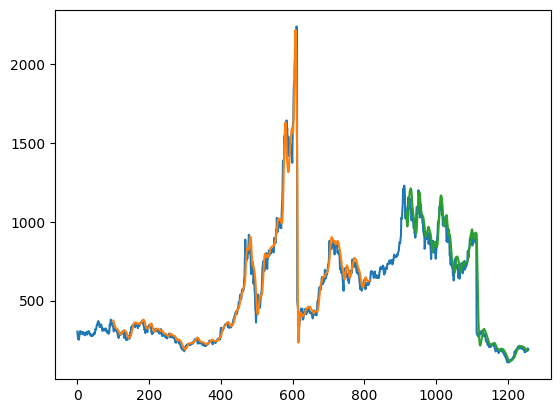

In [47]:
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np. nan
trainPredictPlot [look_back: len(train_predict) +look_back, :] = train_predict
#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot [len (train_predict)+(look_back*2)+1:len (df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot) 
plt.plot(testPredictPlot)
plt.show()

In [48]:
len(test_data)

441

In [49]:
441 - 100

341